# Project Demo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

from FaceDetector import *
from LogoDetector import *
from GenderDetector import *
from DetectorWraper import *
from ShotDetector import *
from DEMO import *
from utils import *
from config import *

In [10]:
gender = GenderDetector(load=False)

0.8412698412698413


In [3]:
data = load_data()

clip_1 images importing...
clip_2 images importing...
clip_3 images importing...
Done !


# Shot Detection
---

## 1.  Adaptive Thresholding

##    $$\mathbf{W} = \text{ window size}$$
##    $$T_{c}= \text{threshold constant}$$
####    The threshold $m_{t}$ at any time slot $t$ is defined as:
##    $$m_{t} = \max(\mu_{left} + T_{c}\sqrt{\sigma_{left}},\;\; \mu_{right} + T_{c}\sqrt{\sigma_{right}})$$
####    $left$ is defined as all frames within interval:         $[t - \left \lfloor{\frac{W}{2}}\right \rfloor)$, $\mu_{left}, \; \sigma_{left}$ is the mean nand variance of the interval
---

# 2.  Color based shot detection

### Mean Intensity Measurement

method used: mean_pixel_intensity

[Clip_1]   Recall: 1.00   Precision: 0.33   Combine: 0.50    Correct: 1   Missed: 0    False detect: 2
[Clip_2]   Recall: 1.00   Precision: 0.80   Combine: 0.89    Correct: 8   Missed: 0    False detect: 2
[Clip_3]   Recall: 0.67   Precision: 0.40   Combine: 0.50    Correct: 4   Missed: 2    False detect: 6


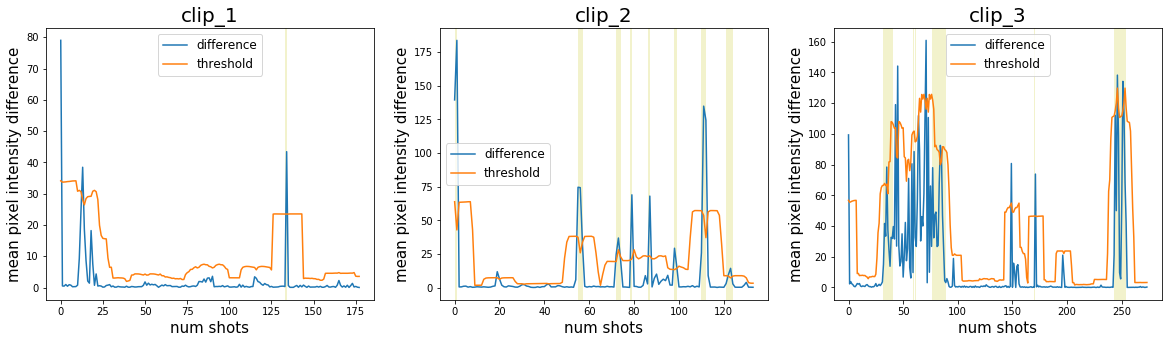

In [4]:
shotDetector = ShotDetector(data)
shotDetector.show_detection('mean_pixel_intensity')

### Color Histogram Comparison

<img  src="pic/rb-1.png" alt="drawing" width="200"/> <img  src="pic/br-1.png" alt="drawing" width="200"/>

method used: color_histogram_difference

time used: 0.005286216735839844
[Clip_1]   Recall: 1.00   Precision: 0.33   Combine: 0.50    Correct: 1   Missed: 0    False detect: 2
time used: 0.002432107925415039
[Clip_2]   Recall: 1.00   Precision: 0.53   Combine: 0.70    Correct: 8   Missed: 0    False detect: 7
time used: 0.0023641586303710938
[Clip_3]   Recall: 0.67   Precision: 0.33   Combine: 0.44    Correct: 4   Missed: 2    False detect: 8


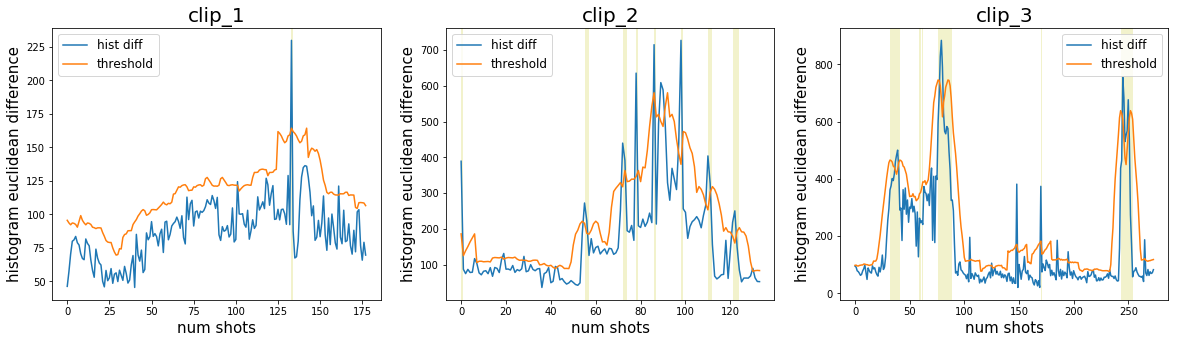

In [5]:
shotDetector.show_detection('color_histogram_difference', True)

---

## Edge Change Rate

<img  src="pic/redbox.png" alt="drawing" width="200"/> <img  src="pic/redboxmove.png" alt="drawing" width="200"/>

method used: edge_change_rate

time used: 0.0032999515533447266
[Clip_1]   Recall: 1.00   Precision: 1.00   Combine: 1.00    Correct: 1   Missed: 0    False detect: 0
time used: 0.002137899398803711
[Clip_2]   Recall: 0.75   Precision: 1.00   Combine: 0.86    Correct: 6   Missed: 2    False detect: 0
time used: 0.002523183822631836
[Clip_3]   Recall: 0.83   Precision: 0.62   Combine: 0.71    Correct: 5   Missed: 1    False detect: 3


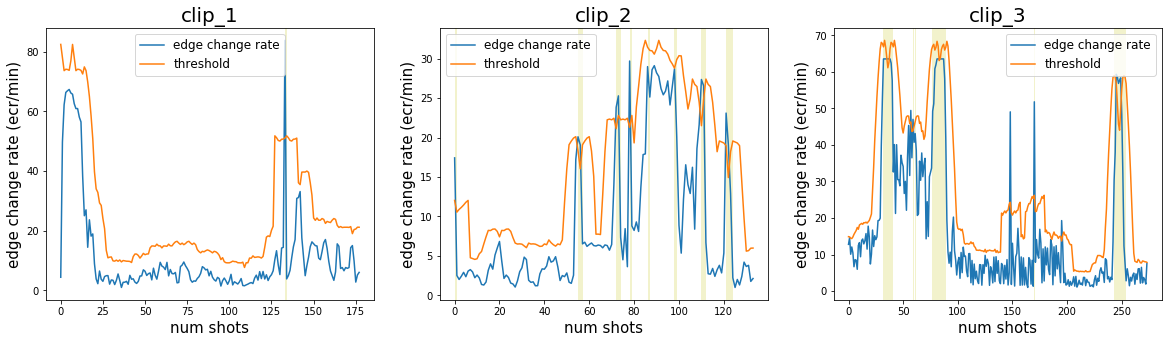

In [6]:
shotDetector.show_detection('edge_change_rate', True)

---
- **Color** based detection is more **robust to camera motion**  
  **weak** to **new color feature** introduction to new frame
- **Feature** based detection is more **robust to color change**  
  **weak** to low **frame-per-second**
---

# Face Detection
----

### Haar-like feature Cascade Classifier

<img  src="pic/feature.png" alt="drawing" width="200"/>

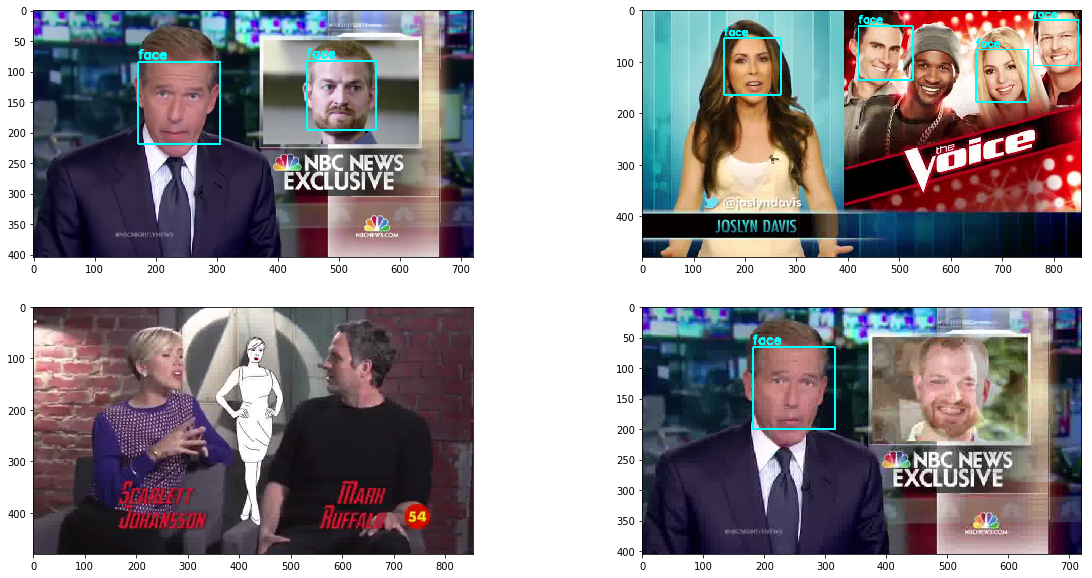

In [7]:
face_demo(data)

#### Drawback
- Due to the implemetation of the alogrithm, it unable to detect face with another face **overlapped**
- Side face not detected
---

# Logo Detection
----

##   $$\text{SIFT} \rightarrow \text{Keypoint Match} \rightarrow \text{RANSAC} \rightarrow \text{Homography} $$

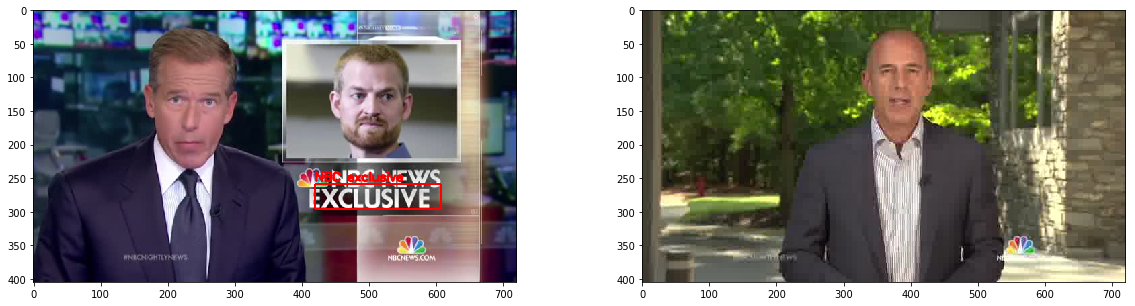

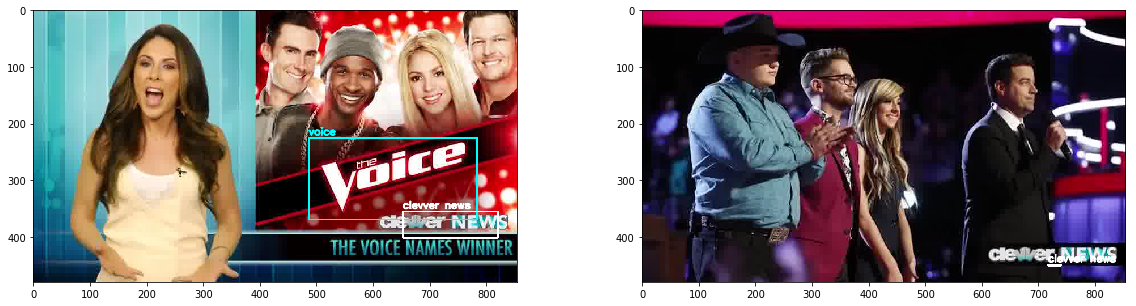

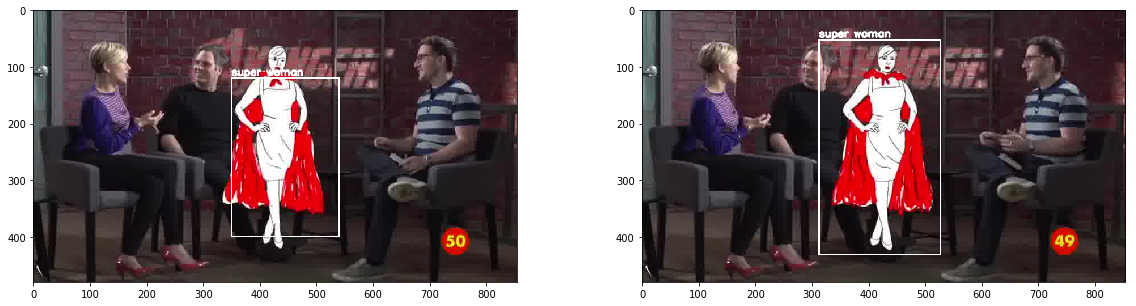

In [8]:
logo_demo(data)

#### Drawback
- Very sensitive to **intensity noice**
- Unable to detect **multiple Logo**
---

# Face tracing
---

<img src="pic/track.png" alt="drawing" width="400"/>

### Similarity function $S(img1, img2)$:
$$S(img1, img2) = \frac{1}{ColorHist_{Diff}(img1, img2)+HoG_{Diff}(img1, img2)+1}$$

# Gender Predict
---

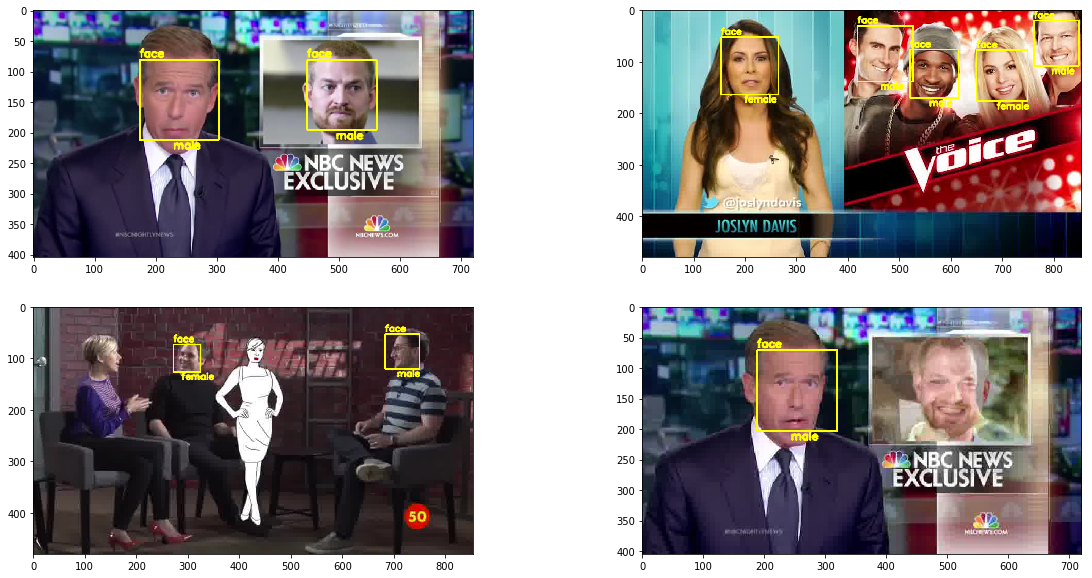

In [11]:
gender_demo(data, gender)